In [8]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df = pd.read_csv("input.txt", sep="\t")
df

,drug,cell,CHEM_mBit_0,CHEM_mBit_1,CHEM_mBit_2,CHEM_mBit_3,CHEM_mBit_4,CHEM_mBit_5,CHEM_mBit_6,CHEM_mBit_7,...,CNV_PID_FGF_PATHWAY,CNV_PID_INTEGRIN_A4B1_PATHWAY,CNV_PID_RAC1_PATHWAY,CNV_PID_RB_1PATHWAY,CNV_PID_FAK_PATHWAY,CNV_PID_HNF3A_PATHWAY,CNV_PID_TGFBR_PATHWAY,CNV_PID_HES_HEY_PATHWAY,CNV_PID_IL12_STAT4_PATHWAY,resp
0,5-Fluorouracil,SIDM00003,0,0,0,0,0,0,0,0,...,-0.202481,0.710534,-0.379883,0.028904,0.210419,0.213262,0.453636,0.265748,-0.712438,-2.338073
1,5-Fluorouracil,SIDM00023,0,0,0,0,0,0,0,0,...,0.661488,0.403611,0.576622,0.561943,0.605328,0.564305,0.740863,0.459258,0.126431,-3.405921
2,5-Fluorouracil,SIDM00042,0,0,0,0,0,0,0,0,...,1.094705,0.595164,0.850219,0.541502,0.874421,0.085973,0.877290,0.815718,-0.379649,-2.298676
3,5-Fluorouracil,SIDM00043,0,0,0,0,0,0,0,0,...,1.289834,0.743468,1.195775,1.165374,1.129053,0.499128,1.137020,0.319198,1.440037,-1.212608
4,5-Fluorouracil,SIDM00044,0,0,0,0,0,0,0,0,...,1.378778,1.464371,0.818498,1.147000,1.771766,1.016881,1.390922,0.905432,1.167191,-2.144542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37727,ZM447439,SIDM00875,1,0,0,1,0,0,0,0,...,0.617369,0.306666,0.056520,-0.148349,0.584387,-0.465893,0.339373,-0.192468,0.919699,-0.906890
37728,ZM447439,SIDM00885,1,0,0,1,0,0,0,0,...,-0.098294,0.313757,-0.378881,0.385478,-0.395449,-0.255722,-0.244095,0.451733,-0.426693,-0.968079
37729,ZM447439,SIDM00954,1,0,0,1,0,0,0,0,...,-0.026414,0.011968,0.440743,0.168409,-0.124132,0.654381,-0.240379,0.163323,-0.289958,-0.418223
37730,ZM447439,SIDM00971,1,0,0,1,0,0,0,0,...,0.195064,-0.046004,0.477824,0.016270,0.289330,1.800598,0.224029,0.791649,-0.184594,-1.925085


In [4]:
exp_name = setup(data = df.iloc[:, :-1],  target=df.iloc[:, -1])
best_model = compare_models()

,Description,Value
0,Session id,5709
1,Target,resp
2,Target type,Regression
3,Original data shape,"(37732, 1034)"
4,Transformed data shape,"(37732, 1034)"
5,Transformed train set shape,"(26412, 1034)"
6,Transformed test set shape,"(11320, 1034)"
7,Numeric features,1031
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3542,0.2284,0.4777,0.8430,0.2078,1.3019,4.7260
et,Extra Trees Regressor,0.3521,0.2288,0.4782,0.8427,0.2086,1.1880,116.6680
rf,Random Forest Regressor,0.3613,0.2422,0.4920,0.8335,0.2133,1.2981,136.1590
gbr,Gradient Boosting Regressor,0.3717,0.2525,0.5022,0.8265,0.2162,1.3851,34.7810
ridge,Ridge Regression,0.3803,0.2620,0.5117,0.8199,0.2197,1.3947,1.0480
br,Bayesian Ridge,0.3803,0.2619,0.5116,0.8199,0.2196,1.3974,3.3530
lr,Linear Regression,0.3809,0.2626,0.5123,0.8194,0.2199,1.3968,1.9840
omp,Orthogonal Matching Pursuit,0.3825,0.2649,0.5145,0.8179,0.2203,1.4207,1.3610
huber,Huber Regressor,0.3744,0.2677,0.5171,0.8159,0.2163,1.4789,18.2300
ada,AdaBoost Regressor,0.5528,0.4560,0.6752,0.6862,0.2870,1.2927,30.3900


In [54]:
import io
df = pd.read_csv(io.StringIO("""idx\tModel	MAE	MSE	RMSE	R2	RMSLE	MAPE	TT (Sec)
fnn	FNN\t0.31740442355837084\t0.1840544912741037\t0.4289210246782851	0.8430	0.2078	1.3019	4.7260
lightgbm	Light Gradient Boosting Machine	0.3542	0.2284	0.4777	0.8430	0.2078	1.3019	4.7260
et	Extra Trees Regressor	0.3521	0.2288	0.4782	0.8427	0.2086	1.1880	116.6680
rf	Random Forest Regressor	0.3613	0.2422	0.4920	0.8335	0.2133	1.2981	136.1590
gbr	Gradient Boosting Regressor	0.3717	0.2525	0.5022	0.8265	0.2162	1.3851	34.7810
ridge	Ridge Regression	0.3803	0.2620	0.5117	0.8199	0.2197	1.3947	1.0480
br	Bayesian Ridge	0.3803	0.2619	0.5116	0.8199	0.2196	1.3974	3.3530
lr	Linear Regression	0.3809	0.2626	0.5123	0.8194	0.2199	1.3968	1.9840
omp	Orthogonal Matching Pursuit	0.3825	0.2649	0.5145	0.8179	0.2203	1.4207	1.3610
huber	Huber Regressor	0.3744	0.2677	0.5171	0.8159	0.2163	1.4789	18.2300
ada	AdaBoost Regressor	0.5528	0.4560	0.6752	0.6862	0.2870	1.2927	30.3900
dt	Decision Tree Regressor	0.5053	0.4792	0.6922	0.6702	0.2811	1.9067	3.1480
par	Passive Aggressive Regressor	0.5567	0.5148	0.7127	0.6463	0.2992	1.9177	1.1640
en	Elastic Net	0.7215	0.8727	0.9340	0.4002	0.3642	2.2270	0.6430
knn	K Neighbors Regressor	0.7721	1.0742	1.0362	0.2618	0.3669	2.3014	5.3270
lasso	Lasso Regression	0.9079	1.4066	1.1857	0.0334	0.3455	2.5717	0.6530
llar	Lasso Least Angle Regression	0.9079	1.4066	1.1857	0.0334	0.3455	2.5717	1.1280"""), sep="\t", index_col=0)
df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
idx,,,,,,,,
fnn,FNN,0.317404,0.184054,0.428921,0.8430,0.2078,1.3019,4.726
lightgbm,Light Gradient Boosting Machine,0.354200,0.228400,0.477700,0.8430,0.2078,1.3019,4.726
et,Extra Trees Regressor,0.352100,0.228800,0.478200,0.8427,0.2086,1.1880,116.668
rf,Random Forest Regressor,0.361300,0.242200,0.492000,0.8335,0.2133,1.2981,136.159
gbr,Gradient Boosting Regressor,0.371700,0.252500,0.502200,0.8265,0.2162,1.3851,34.781
ridge,Ridge Regression,0.380300,0.262000,0.511700,0.8199,0.2197,1.3947,1.048
br,Bayesian Ridge,0.380300,0.261900,0.511600,0.8199,0.2196,1.3974,3.353
lr,Linear Regression,0.380900,0.262600,0.512300,0.8194,0.2199,1.3968,1.984
omp,Orthogonal Matching Pursuit,0.382500,0.264900,0.514500,0.8179,0.2203,1.4207,1.361


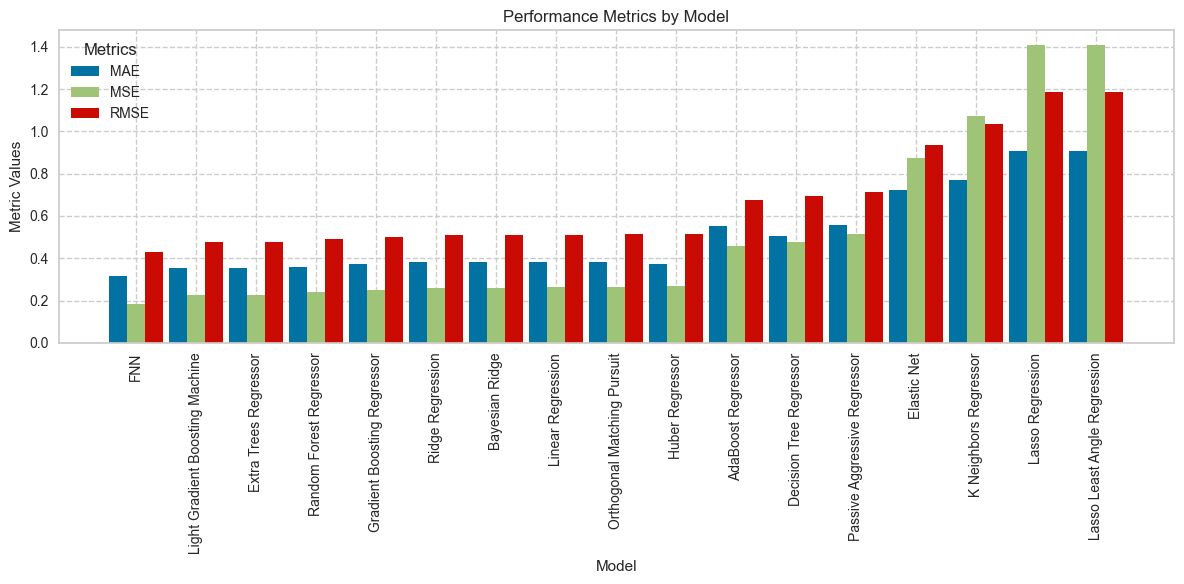

In [55]:
# fig, ax = plt.subplots()

# metrics = ["MAE", "MSE", "RMSE", "R2"]
# n_groups = df.shape[0]
# count = 0
# for idx, row in df.iterrows():
#     kwargs = {"color": ["r", "g", "y", "b"], "label":row["Model"]}
#     values = []
#     for label in bar_labels:
#         values.append(row[label])
#     # print([i for i in range(count*len(bar_labels), (idx+1)*len(bar_labels))])
#     ax.bar([i for i in range(count*len(bar_labels), (count+1)*len(bar_labels))], values, **kwargs)
#     # ax.bar(idx, row["MAE"], color="r")
#     # ax.bar(idx, row["MSE"], color="g")
#     # ax.bar(idx, row["RMSE"], color="y")
#     count += 1

# # ax.bar([row[label])

# ax.legend(bar_labels)
# ax.set_xticks(range(df.shape[0]), df["Model"].values, rotation=90)
# fig.suptitle("Performance Comparision between different Regressions")
# fig.tight_layout()

metrics = ["MAE", "MSE", "RMSE"] #, "R2"]
x = np.arange(len(df["Model"]))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, df[metric], width, label=metric)

# Formatting the plot
ax.set_xlabel("Model")
ax.set_ylabel("Metric Values")
ax.set_title("Performance Metrics by Model")
ax.set_xticks(x + width * (len(metrics) / 2 - 0.5))
ax.set_xticklabels(df["Model"], rotation=90)
ax.legend(title="Metrics")
plt.tight_layout()
plt.grid(linestyle="--")
plt.show()

In [49]:
fig.savefig("regression_comparison.png")

In [21]:
mutation=pd.read_csv("mutations_all_20230202.csv")
mutation

,gene_id,gene_symbol,model_id,protein_mutation,rna_mutation,cdna_mutation,cancer_driver,cancer_predisposition_variant,effect,vaf,coding,source,model_name
0,SIDG17159,MAN1A2,SIDM01279,-,r.?,-,False,False,intronic,0.2973,False,Sanger,HCM-SANG-0269-C18
1,SIDG36607,ST8SIA5,SIDM02021,-,r.?,-,False,False,intronic,0.3889,False,Sanger,HCM-SANG-1082-C15
2,SIDG16700,LONRF2,SIDM02021,-,r.?,-,False,False,downstream,0.4667,False,Sanger,HCM-SANG-1082-C15
3,SIDG09188,FLRT2,SIDM01954,-,r.?,-,False,False,intronic,1.0000,False,Sanger,HCM-SANG-0537-C18
4,SIDG21177,MYO1E,SIDM01954,-,r.?,-,False,False,intronic,0.3611,False,Sanger,HCM-SANG-0537-C18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050687,SIDG05667,CTNNA3,SIDM01444,-,r.?,-,False,False,intronic,0.2000,False,Broad,SNU-626
10050688,SIDG00990,ANK3,SIDM01444,p.R1468H,r.4740g>a,c.4403G>A,False,False,missense,1.0000,True,Broad,SNU-626
10050689,SIDG00990,ANK3,SIDM01444,-,r.?,-,False,False,intronic,1.0000,False,Broad,SNU-626
10050690,SIDG02285,BICC1,SIDM01444,-,r.?,-,False,False,intronic,0.8889,False,Broad,SNU-626


In [52]:
expression = pd.read_csv("rnaseq_sanger_20210316.csv")
expression

,model_id,model_name,data_source,gene_id,gene_symbol,read_count,fpkm
0,SIDM01240,451Lu,sanger,SIDG00001,A1BG,127,0.19
1,SIDM01240,451Lu,sanger,SIDG00002,A1BG-AS1,1991,4.19
2,SIDM01240,451Lu,sanger,SIDG00003,A1CF,0,0.00
3,SIDM01240,451Lu,sanger,SIDG00004,A2M,93979,86.50
4,SIDM01240,451Lu,sanger,SIDG00005,A2M-AS1,35,0.09
...,...,...,...,...,...,...,...
16470241,SIDM00573,no-11,sanger,SIDG42474,ZZEF1,18309,6.39
16470242,SIDM00573,no-11,sanger,SIDG42475,ZZZ3,13041,8.02
16470243,SIDM00573,no-11,sanger,SIDG42479,RSKR,1629,1.94
16470244,SIDM00573,no-11,sanger,SIDG42480,SHLD3,400,1.13


In [53]:
cnv=pd.read_csv("cnv_summary_20230303.csv")
cnv

,model_name,model_id,symbol,gene_id,total_copy_number,cn_category,source,data_type
0,MEC-1,SIDM00001,CACNA1D,SIDG03307,2.0000,Neutral,Broad,WES
1,MEC-1,SIDM00001,CD58,SIDG03973,2.0000,Neutral,Broad,WES
2,MEC-1,SIDM00001,IL21R,SIDG13010,2.0000,Neutral,Broad,WES
3,MEC-1,SIDM00001,FOXA2,SIDG09272,2.0000,Neutral,Broad,WES
4,MEC-1,SIDM00001,CALR,SIDG03383,2.0000,Neutral,Broad,WES
...,...,...,...,...,...,...,...,...
1137354,HCM-SANG-1308-C25,SIDM02080,FLT4,SIDG09194,2.0641,Neutral,Sanger,WGS
1137355,HCM-SANG-1308-C25,SIDM02080,IRF4,SIDG13228,2.0471,Neutral,Sanger,WGS
1137356,HCM-SANG-1308-C25,SIDM02080,RIPK1,SIDG27256,1.9979,Neutral,Sanger,WGS
1137357,HCM-SANG-1308-C25,SIDM02080,DEK,SIDG06359,1.9979,Neutral,Sanger,WGS


In [55]:
cnv[cnv.data_type.eq("WES")].model_name.nunique()

1253

In [6]:
expression=pd.read_csv("ccle/CCLE_expression.csv", index_col=0)
expression

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,SCYGR3 (112441429),SCYGR7 (112441438),OR8S1 (341568),SCYGR6 (112441431),OR4F29 (729759),EEF1AKMT4 (110599564),TBCE (6905),OOSP4A (112577462),ARHGAP11B (89839),OOSP3 (112577461)
ACH-001097,0.000000,0.000000,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.000000,0.0,0.000000,2.980025,5.132988,0.000000,0.443607,0.000000
ACH-001636,0.000000,0.000000,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488,3.620586,...,0.0,0.0,0.000000,0.0,0.000000,4.322649,4.100978,0.000000,2.589763,0.298658
ACH-001804,4.934988,0.000000,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.000000,0.0,0.000000,2.283922,4.288359,0.000000,0.475085,0.000000
ACH-000534,0.839960,0.000000,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460,3.157044,...,0.0,0.0,0.000000,0.0,0.000000,1.333424,4.841470,0.000000,3.904966,0.000000
ACH-000742,3.722466,0.000000,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194,3.258519,...,0.0,0.0,0.000000,0.0,0.000000,1.526069,4.494416,0.000000,0.941106,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000904,4.316870,0.028569,5.990955,3.185867,4.846493,0.286881,0.111031,4.799087,4.995485,4.660495,...,0.0,0.0,0.000000,0.0,0.000000,3.831877,5.882888,0.000000,3.063503,0.000000
ACH-000110,5.227279,0.070389,6.764341,3.537296,4.491212,0.150560,1.150560,5.537296,5.776894,4.766065,...,0.0,0.0,0.000000,0.0,0.014355,4.644433,4.605850,0.000000,1.906891,0.000000
ACH-000261,4.447579,0.028569,6.748864,2.650765,4.607626,0.042644,0.687061,6.400367,4.274262,4.828835,...,0.0,0.0,0.097611,0.0,0.000000,2.615887,4.613532,0.000000,2.411426,0.042644
ACH-000031,4.714795,0.028569,6.745910,2.776104,3.621759,0.056584,3.095924,6.936049,4.976822,4.451541,...,0.0,0.0,0.263034,0.0,0.070389,4.476382,4.425594,0.422233,2.014355,0.084064


In [4]:
mutation=pd.read_csv("ccle/CCLE_mutations.csv", index_col=0)
mutation

/var/folders/75/vd0fyj8s0yd0_6m_t_snnk700000gn/T/ipykernel_38195/1781118389.py:1: DtypeWarning: Columns (20,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation=pd.read_csv("ccle/CCLE_mutations.csv", index_col=0)


,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
0,A1BG,1,37,19,58861767,58861767,+,Silent,SNP,C,...,NaN,73:68,NaN,NaN,NaN,NaN,NaN,NaN,silent,ACH-001991
3,A1BG,1,37,19,58862897,58862897,+,Missense_Mutation,SNP,G,...,NaN,304:470,NaN,NaN,NaN,NaN,NaN,NaN,other non-conserving,ACH-002022
4,A1BG,1,37,19,58858743,58858743,+,Missense_Mutation,SNP,C,...,NaN,NaN,20:16,20:16,NaN,NaN,NaN,NaN,other non-conserving,ACH-000986
5,A1BG,1,37,19,58858810,58858810,+,Silent,SNP,C,...,NaN,NaN,10:21,14:23,34:87,NaN,NaN,22:19,silent,ACH-000988
6,A1BG,1,37,19,58858867,58858867,+,Missense_Mutation,SNP,C,...,NaN,NaN,4:9,4:9,NaN,NaN,NaN,NaN,other non-conserving,ACH-002182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302221,ZZZ3,26009,37,1,78098868,78098868,+,Missense_Mutation,SNP,G,...,NaN,NaN,49:260,48:248,NaN,NaN,NaN,NaN,other non-conserving,ACH-002280
1302222,ZZZ3,26009,37,1,78098935,78098935,+,Silent,SNP,A,...,NaN,NaN,NaN,NaN,6:15,NaN,NaN,NaN,silent,ACH-000992
1302223,ZZZ3,26009,37,1,78098970,78098970,+,Frame_Shift_Del,DEL,A,...,NaN,NaN,31:8,40:87,11:64,NaN,NaN,6:16,damaging,ACH-000985
1302224,ZZZ3,26009,37,1,78098986,78098986,+,Silent,SNP,G,...,NaN,NaN,84:28,90:33,57:46,NaN,NaN,29:12,silent,ACH-000665


In [5]:
cnv=pd.read_csv("ccle/CCLE_gene_cn.csv", index_col=0)
cnv

,A1BG (1),NAT2 (10),ADA (100),CDH2 (1000),AKT3 (10000),GAGE12F (100008586),RNA5-8SN5 (100008587),RNA18SN5 (100008588),RNA28SN5 (100008589),LINC02584 (100009613),...,HNRNPDL (9987),DMTF1 (9988),PPP4R1 (9989),CDH1 (999),SLC12A6 (9990),PTBP3 (9991),KCNE2 (9992),DGCR2 (9993),CASP8AP2 (9994),SCO2 (9997)
ACH-000001,1.179621,1.098639,1.199020,0.733573,1.009197,1.607905,1.177329,1.177329,1.177329,1.001387,...,0.987165,0.953195,1.385347,0.748888,0.930416,0.742241,1.398255,1.177329,0.995021,0.747212
ACH-000002,1.009801,0.981249,1.012577,1.315756,1.009073,0.611316,1.022060,1.022060,1.022060,0.996967,...,0.998968,1.004020,1.315756,1.015739,0.986230,1.005236,1.006528,1.022060,1.001574,1.022060
ACH-000003,1.022828,1.067509,1.524481,0.619630,1.001801,1.006063,0.950577,0.950577,0.950577,1.397002,...,0.923635,1.116181,0.994162,1.175473,0.876896,1.018163,0.985919,0.244061,0.969969,0.244061
ACH-000004,1.232225,1.061091,0.836336,1.054544,1.060779,1.018872,1.035168,1.035168,1.035168,1.071960,...,0.821476,0.833216,1.032713,0.824302,1.087132,0.820478,1.577572,1.098392,1.085809,0.822388
ACH-000005,1.151880,1.112505,0.816603,1.051343,1.084702,0.523496,0.844142,0.844142,0.844142,1.099404,...,0.867494,0.821698,0.843875,0.813705,1.119510,0.823270,1.726203,0.844142,1.098309,0.812665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002045,0.867459,0.831747,1.136317,0.474834,1.085518,0.561373,1.176447,1.176447,1.176447,1.666603,...,0.872275,1.154031,0.840910,0.855439,0.850869,1.383327,0.847409,1.176447,1.146966,0.869611
ACH-002059,1.074234,1.017901,1.008777,0.983393,1.054072,0.669767,1.016876,1.016876,1.016876,1.048420,...,1.036241,1.035580,1.045177,1.032512,1.032774,0.590656,1.019161,1.079776,1.030587,1.031237
ACH-002062,1.144470,1.156380,1.124883,0.903094,1.107235,0.921942,1.284217,1.284217,1.284217,0.968783,...,0.958271,1.375354,0.903094,0.897947,0.905590,0.916182,1.113917,1.284217,0.938142,0.876929
ACH-001421,0.998091,0.963633,0.979534,0.946760,1.258505,0.921985,0.968023,0.968023,0.968023,0.985983,...,0.971288,0.976895,0.946760,0.978355,0.977533,1.294315,1.293088,0.968023,0.958595,0.968023


In [64]:
cols = {}
for c in df:
    identifier = c.split("_", 1)[0] 
    if identifier in cols:
        cols[identifier].append(c)
    else:
        cols[identifier] = [c]
cols

{'drug': ['drug'],
 'cell': ['cell'],
 'CHEM': ['CHEM_mBit_0',
  'CHEM_mBit_1',
  'CHEM_mBit_2',
  'CHEM_mBit_3',
  'CHEM_mBit_4',
  'CHEM_mBit_5',
  'CHEM_mBit_6',
  'CHEM_mBit_7',
  'CHEM_mBit_8',
  'CHEM_mBit_9',
  'CHEM_mBit_10',
  'CHEM_mBit_11',
  'CHEM_mBit_12',
  'CHEM_mBit_13',
  'CHEM_mBit_14',
  'CHEM_mBit_15',
  'CHEM_mBit_16',
  'CHEM_mBit_17',
  'CHEM_mBit_18',
  'CHEM_mBit_19',
  'CHEM_mBit_20',
  'CHEM_mBit_21',
  'CHEM_mBit_22',
  'CHEM_mBit_23',
  'CHEM_mBit_24',
  'CHEM_mBit_25',
  'CHEM_mBit_26',
  'CHEM_mBit_27',
  'CHEM_mBit_28',
  'CHEM_mBit_29',
  'CHEM_mBit_30',
  'CHEM_mBit_31',
  'CHEM_mBit_32',
  'CHEM_mBit_33',
  'CHEM_mBit_34',
  'CHEM_mBit_35',
  'CHEM_mBit_36',
  'CHEM_mBit_37',
  'CHEM_mBit_38',
  'CHEM_mBit_39',
  'CHEM_mBit_40',
  'CHEM_mBit_41',
  'CHEM_mBit_42',
  'CHEM_mBit_43',
  'CHEM_mBit_44',
  'CHEM_mBit_45',
  'CHEM_mBit_46',
  'CHEM_mBit_47',
  'CHEM_mBit_48',
  'CHEM_mBit_49',
  'CHEM_mBit_50',
  'CHEM_mBit_51',
  'CHEM_mBit_52',
  'CHEM_mB

In [67]:
df[[c[0] for c in cols.values()]]
df.shape

(37732, 1034)

In [74]:
cnv.reset_index().melt(id_vars=["index"], var_name="gene", value_name="cnv")

,index,gene,cnv
0,ACH-000001,A1BG (1),1.179621
1,ACH-000002,A1BG (1),1.009801
2,ACH-000003,A1BG (1),1.022828
3,ACH-000004,A1BG (1),1.232225
4,ACH-000005,A1BG (1),1.151880
...,...,...,...
47345602,ACH-002045,SCO2 (9997),0.869611
47345603,ACH-002059,SCO2 (9997),1.031237
47345604,ACH-002062,SCO2 (9997),0.876929
47345605,ACH-001421,SCO2 (9997),0.968023


In [75]:
mutation.reset_index().melt(id_vars=["index"], var_name="gene", value_name="mutation")

,index,gene,cnv
0,ACH-001097,TSPAN6 (7105),0.000000
1,ACH-001636,TSPAN6 (7105),0.000000
2,ACH-001804,TSPAN6 (7105),4.934988
3,ACH-000534,TSPAN6 (7105),0.839960
4,ACH-000742,TSPAN6 (7105),3.722466
...,...,...,...
24312875,ACH-000904,OOSP3 (112577461),0.000000
24312876,ACH-000110,OOSP3 (112577461),0.000000
24312877,ACH-000261,OOSP3 (112577461),0.042644
24312878,ACH-000031,OOSP3 (112577461),0.084064


In [76]:
expression.reset_index().melt(id_vars=["index"], var_name="gene", value_name="expression")

,index,gene,expression
0,ACH-001097,TSPAN6 (7105),0.000000
1,ACH-001636,TSPAN6 (7105),0.000000
2,ACH-001804,TSPAN6 (7105),4.934988
3,ACH-000534,TSPAN6 (7105),0.839960
4,ACH-000742,TSPAN6 (7105),3.722466
...,...,...,...
24312875,ACH-000904,OOSP3 (112577461),0.000000
24312876,ACH-000110,OOSP3 (112577461),0.000000
24312877,ACH-000261,OOSP3 (112577461),0.042644
24312878,ACH-000031,OOSP3 (112577461),0.084064


In [13]:
x=pd.concat([expression.reset_index().melt(id_vars=["index"], var_name="gene", value_name="expression"),
        mutation.reset_index().melt(id_vars=["index"], var_name="gene", value_name="mutation"),
        cnv.reset_index().melt(id_vars=["index"], var_name="gene", value_name="cnv")], axis=1)

In [87]:
x.isna().sum()

index                0
gene                 0
expression    90862989
mutation      81398580
cnv           67830262
dtype: int64

In [10]:
expression.columns=expression.columns.str.split("\(").str[0]
mutation.columns=mutation.columns.str.split("\(").str[0]
cnv.columns=cnv.columns.str.split("\(").str[0]

In [2]:
import pandas as pd

In [14]:
x.isna().sum()

index         23032727
gene          23032727
expression    23032727
index          3828225
gene           3828225
mutation      13568318
index                0
gene                 0
cnv                  0
dtype: int64

In [12]:
expression

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCYGR3,SCYGR7,OR8S1,SCYGR6,OR4F29,EEF1AKMT4,TBCE,OOSP4A,ARHGAP11B,OOSP3
ACH-001097,0.000000,0.000000,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.000000,0.0,0.000000,2.980025,5.132988,0.000000,0.443607,0.000000
ACH-001636,0.000000,0.000000,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488,3.620586,...,0.0,0.0,0.000000,0.0,0.000000,4.322649,4.100978,0.000000,2.589763,0.298658
ACH-001804,4.934988,0.000000,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.000000,0.0,0.000000,2.283922,4.288359,0.000000,0.475085,0.000000
ACH-000534,0.839960,0.000000,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460,3.157044,...,0.0,0.0,0.000000,0.0,0.000000,1.333424,4.841470,0.000000,3.904966,0.000000
ACH-000742,3.722466,0.000000,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194,3.258519,...,0.0,0.0,0.000000,0.0,0.000000,1.526069,4.494416,0.000000,0.941106,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000904,4.316870,0.028569,5.990955,3.185867,4.846493,0.286881,0.111031,4.799087,4.995485,4.660495,...,0.0,0.0,0.000000,0.0,0.000000,3.831877,5.882888,0.000000,3.063503,0.000000
ACH-000110,5.227279,0.070389,6.764341,3.537296,4.491212,0.150560,1.150560,5.537296,5.776894,4.766065,...,0.0,0.0,0.000000,0.0,0.014355,4.644433,4.605850,0.000000,1.906891,0.000000
ACH-000261,4.447579,0.028569,6.748864,2.650765,4.607626,0.042644,0.687061,6.400367,4.274262,4.828835,...,0.0,0.0,0.097611,0.0,0.000000,2.615887,4.613532,0.000000,2.411426,0.042644
ACH-000031,4.714795,0.028569,6.745910,2.776104,3.621759,0.056584,3.095924,6.936049,4.976822,4.451541,...,0.0,0.0,0.263034,0.0,0.070389,4.476382,4.425594,0.422233,2.014355,0.084064


In [18]:
mutation.isna().sum()

Hugo_Symbol                     0
Entrez_Gene_Id                  0
NCBI_Build                      0
Chromosome                      0
Start_position                  0
End_position                    0
Strand                          0
Variant_Classification          2
Variant_Type                    0
Reference_Allele                0
Tumor_Seq_Allele1               0
dbSNP_RS                  1084915
dbSNP_Val_Status          1244359
Genome_Change                 106
Annotation_Transcript         111
Tumor_Sample_Barcode            0
cDNA_Change                 26127
Codon_Change                 5753
Protein_Change              26135
isDeleterious                   2
isTCGAhotspot                   0
TCGAhsCnt                   53424
isCOSMIChotspot                 0
COSMIChsCnt                    83
ExAC_AF                    971107
CGA_WES_AC                 837895
SangerWES_AC               645581
SangerRecalibWES_AC        528359
RNAseq_AC                  833499
HC_AC         

In [27]:
expression.isna().sum()

TSPAN6        0
TNMD          0
DPM1          0
SCYL3         0
C1orf112      0
             ..
EEF1AKMT4     0
TBCE          0
OOSP4A        0
ARHGAP11B     0
OOSP3         0
Length: 19144, dtype: int64

In [28]:
mutation.isna().sum()

gene_id                          0
gene_symbol                      0
model_id                         0
protein_mutation                 0
rna_mutation                     0
cdna_mutation                    0
cancer_driver                    0
cancer_predisposition_variant    0
effect                           0
vaf                              0
coding                           0
source                           0
model_name                       0
dtype: int64

In [29]:
cnv.isna().sum()

A1BG         0
NAT2         0
ADA          0
CDH2         0
AKT3         0
            ..
PTBP3        0
KCNE2        0
DGCR2        0
CASP8AP2     0
SCO2         0
Length: 27639, dtype: int64

In [32]:
drug=pd.read_csv("/Users/thepyguy/Desktop/assignments/CAP-5610-final-project/Drug_sensitivity_IC50_(Sanger_GDSC1)_subsetted (1).csv", index_col=0)

In [33]:
drug

,ERLOTINIB (GDSC1:1),AICA RIBONUCLEOTIDE (GDSC1:1001),VELBAN (GDSC1:1004),CIS-DDP (GDSC1:1005),CYTARABINE (GDSC1:1006),DOCETAXEL (GDSC1:1007),ABITREXATE (GDSC1:1008),ATRA (GDSC1:1009),GEFITINIB (GDSC1:1010),NAVITOCLAX (GDSC1:1011),...,BMS-509744 (GDSC1:63),CMK (GDSC1:64),CHLORIDINE (GDSC1:71),JW-7-52-1 (GDSC1:83),A-443654 (GDSC1:86),GW843682X (GDSC1:87),ENTINOSTAT (GDSC1:88),PARTHENOLIDE (GDSC1:89),LLL CPD (GDSC1:9),TGX 221 (GDSC1:94)
ACH-000001,NaN,NaN,-8.436349,NaN,NaN,-7.275349,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000002,NaN,9.252952,-7.069426,3.160163,NaN,-7.168425,NaN,NaN,NaN,-3.216113,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.017104,NaN,-1.075444,NaN
ACH-000004,NaN,10.379682,-4.314050,1.040777,-4.504289,NaN,-6.248732,NaN,NaN,0.211601,...,NaN,NaN,3.366938,-4.848835,-0.841270,-5.945220,-1.089258,1.657674,-2.141731,NaN
ACH-000006,NaN,9.670194,-5.518255,NaN,NaN,NaN,-6.070819,NaN,NaN,NaN,...,3.243567,NaN,NaN,-1.032998,-2.570707,-5.045605,-0.648028,NaN,NaN,NaN
ACH-000007,NaN,NaN,NaN,NaN,-0.914308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.189040,NaN,NaN,NaN,NaN,-0.031654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002313,NaN,10.083291,-5.032625,NaN,-1.578226,NaN,-3.463150,NaN,NaN,0.274411,...,NaN,NaN,1.979162,NaN,NaN,NaN,1.950097,NaN,-1.075071,NaN
ACH-002314,NaN,9.750952,-7.099140,NaN,NaN,NaN,-4.310122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-002316,NaN,NaN,-5.999972,3.269291,-0.037478,NaN,-4.918324,NaN,NaN,NaN,...,NaN,0.197417,0.676388,-3.921895,-1.739684,-4.629703,-1.724884,1.355107,-1.809863,NaN
ACH-002317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
col_mask=drug.apply(lambda col: (col.isna().sum()/drug.shape[0])>0.8)
print("Total Number of Drugs in GDSC: ", drug.shape[1])
print("Drugs dropped (Over 80% values missing)") 
print(drug.columns[col_mask])
print("Drugs kept (Less than 80% values missing)")
drug.columns[~col_mask]

Total Number of Drugs in GDSC:  310
Drugs dropped (Over 80% values missing)
Index(['ERLOTINIB (GDSC1:1)', 'ABITREXATE (GDSC1:1008)', 'ATRA (GDSC1:1009)',
       'GEFITINIB (GDSC1:1010)', 'NAVITOCLAX (GDSC1:1011)',
       'NILOTINIB (GDSC1:1013)', 'AY-22989 (GDSC1:1016)',
       'OLAPARIB (GDSC1:1017)', 'ABT 888 (GDSC1:1018)', 'BOSULIF (GDSC1:1019)',
       ...
       'KIN001-123 (GDSC1:59)', 'PHA 665752 (GDSC1:6)', 'BI-2536 (GDSC1:60)',
       'BMS 536924 (GDSC1:62)', 'BMS-509744 (GDSC1:63)', 'CMK (GDSC1:64)',
       'CHLORIDINE (GDSC1:71)', 'JW-7-52-1 (GDSC1:83)',
       'PARTHENOLIDE (GDSC1:89)', 'TGX 221 (GDSC1:94)'],
      dtype='object', length=178)
Drugs kept (Less than 80% values missing)


Index(['AICA RIBONUCLEOTIDE (GDSC1:1001)', 'VELBAN (GDSC1:1004)',
       'CIS-DDP (GDSC1:1005)', 'CYTARABINE (GDSC1:1006)',
       'DOCETAXEL (GDSC1:1007)', 'MK-0683 (GDSC1:1012)',
       'BAY 869766 (GDSC1:1014)', '212631-79-3 (GDSC1:1015)',
       'AZD7762 (GDSC1:1022)', 'A-154475 (GDSC1:1024)',
       ...
       'NSC319726 (GDSC1:461)', 'ARRY-520 (GDSC1:474)',
       'SB 505124 (GDSC1:476)', 'LDN-193189 (GDSC1:478)',
       'CGP 60474 (GDSC1:53)',
       'FINGOLIMOD HYDROCHLORIDE; GILENYA; TDI-132; IMUSERA; GILENIA (GDSC1:546)',
       'A-443654 (GDSC1:86)', 'GW843682X (GDSC1:87)', 'ENTINOSTAT (GDSC1:88)',
       'LLL CPD (GDSC1:9)'],
      dtype='object', length=132)

In [47]:
drug

,ERLOTINIB (GDSC1:1),AICA RIBONUCLEOTIDE (GDSC1:1001),VELBAN (GDSC1:1004),CIS-DDP (GDSC1:1005),CYTARABINE (GDSC1:1006),DOCETAXEL (GDSC1:1007),ABITREXATE (GDSC1:1008),ATRA (GDSC1:1009),GEFITINIB (GDSC1:1010),NAVITOCLAX (GDSC1:1011),...,BMS-509744 (GDSC1:63),CMK (GDSC1:64),CHLORIDINE (GDSC1:71),JW-7-52-1 (GDSC1:83),A-443654 (GDSC1:86),GW843682X (GDSC1:87),ENTINOSTAT (GDSC1:88),PARTHENOLIDE (GDSC1:89),LLL CPD (GDSC1:9),TGX 221 (GDSC1:94)
ACH-000001,NaN,NaN,-8.436349,NaN,NaN,-7.275349,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000002,NaN,9.252952,-7.069426,3.160163,NaN,-7.168425,NaN,NaN,NaN,-3.216113,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.017104,NaN,-1.075444,NaN
ACH-000004,NaN,10.379682,-4.314050,1.040777,-4.504289,NaN,-6.248732,NaN,NaN,0.211601,...,NaN,NaN,3.366938,-4.848835,-0.841270,-5.945220,-1.089258,1.657674,-2.141731,NaN
ACH-000006,NaN,9.670194,-5.518255,NaN,NaN,NaN,-6.070819,NaN,NaN,NaN,...,3.243567,NaN,NaN,-1.032998,-2.570707,-5.045605,-0.648028,NaN,NaN,NaN
ACH-000007,NaN,NaN,NaN,NaN,-0.914308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.189040,NaN,NaN,NaN,NaN,-0.031654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002313,NaN,10.083291,-5.032625,NaN,-1.578226,NaN,-3.463150,NaN,NaN,0.274411,...,NaN,NaN,1.979162,NaN,NaN,NaN,1.950097,NaN,-1.075071,NaN
ACH-002314,NaN,9.750952,-7.099140,NaN,NaN,NaN,-4.310122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-002316,NaN,NaN,-5.999972,3.269291,-0.037478,NaN,-4.918324,NaN,NaN,NaN,...,NaN,0.197417,0.676388,-3.921895,-1.739684,-4.629703,-1.724884,1.355107,-1.809863,NaN
ACH-002317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


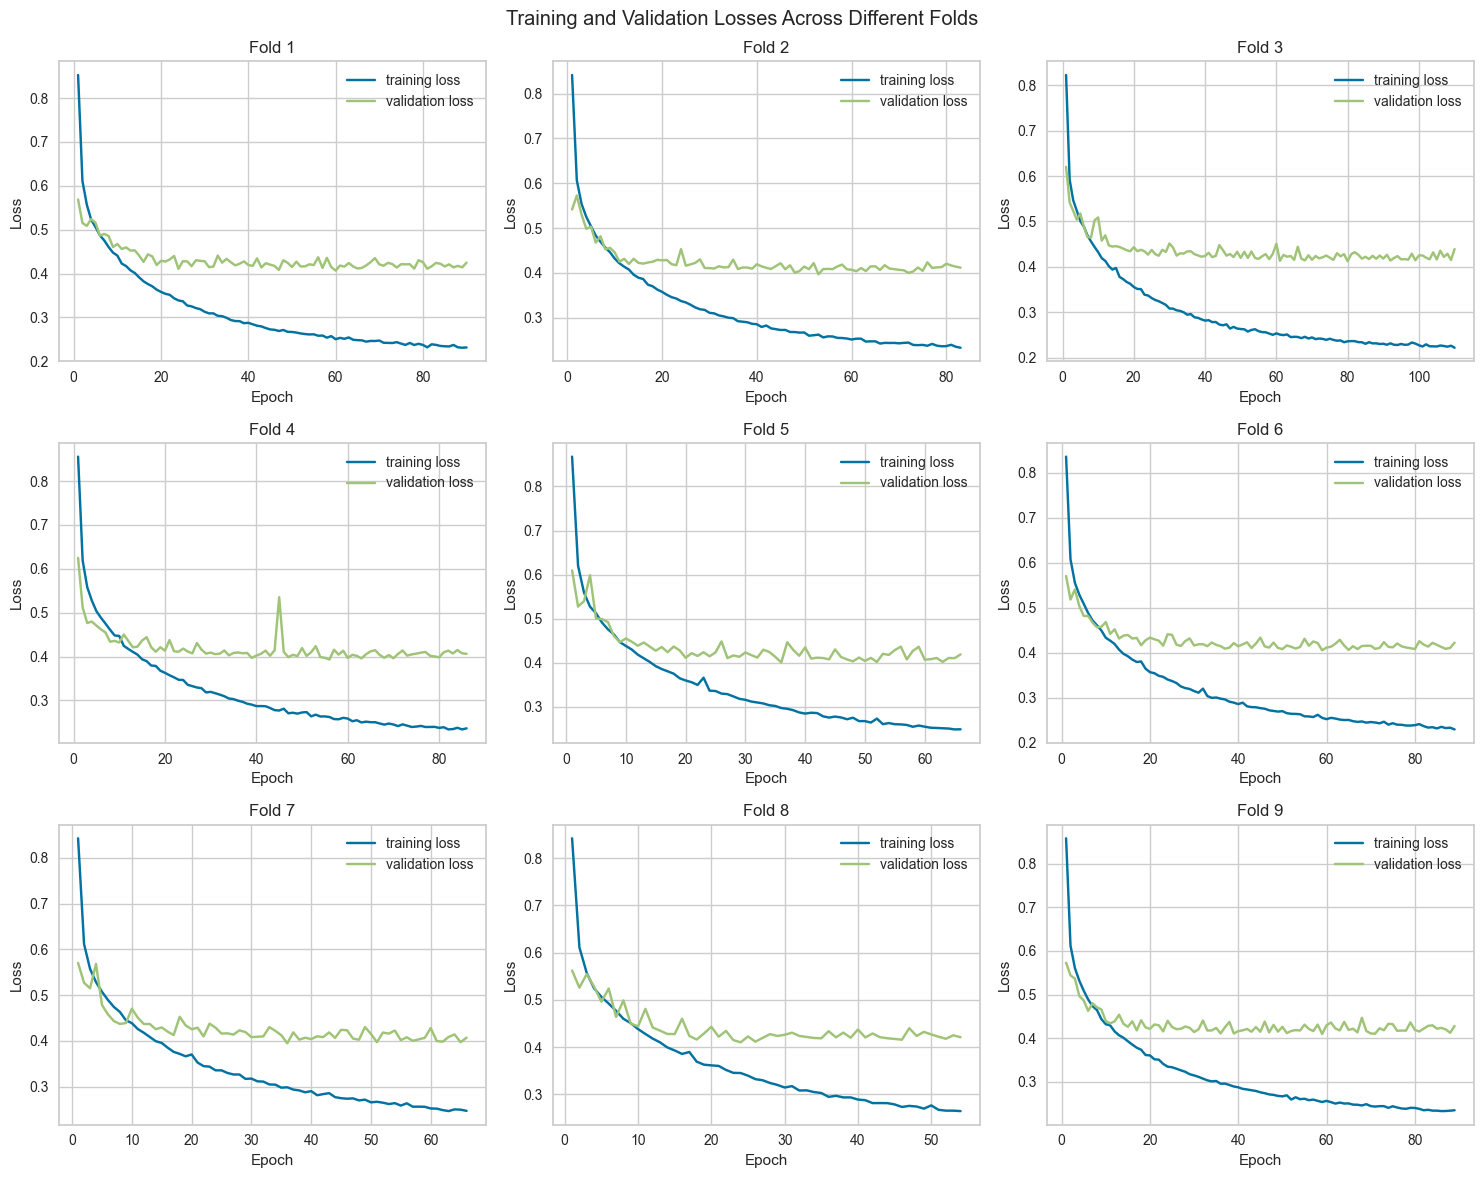

In [34]:
loss = pd.read_csv("/Users/thepyguy/Desktop/assignments/CAP-5610-final-project/output_prefix.FNN.cv_10.Loss.txt", sep="\t")
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
factor = 3
for fold, grp in loss.groupby("fold"):
    if fold==10:
        break
    ax[(fold-1)//factor][(fold-1)%factor].plot(grp["epoch"], grp["train loss"], label="training loss")
    ax[(fold-1)//factor][(fold-1)%factor].plot(grp["epoch"], grp["valid loss"], label="validation loss")
    ax[(fold-1)//factor][(fold-1)%factor].set_xlabel("Epoch")
    ax[(fold-1)//factor][(fold-1)%factor].set_ylabel("Loss")
    ax[(fold-1)//factor][(fold-1)%factor].set_title(f"Fold {fold}")
    ax[(fold-1)//factor][(fold-1)%factor].legend()
fig.suptitle("Training and Validation Losses Across Different Folds")
fig.tight_layout()

In [56]:
predictions = pd.read_csv("/Users/thepyguy/Desktop/assignments/CAP-5610-final-project/output_prefix.FNN.cv_10.Prediction.txt", sep="\t")
predictions.groupby("fold").apply(
    lambda grp: pd.Series({"MAE": (grp.resp - grp.prediction).abs().mean(), 
                           "MSE": ((grp.resp - grp.prediction)**2).mean(),
                           "RMSE": (((grp.resp - grp.prediction)**2).mean())**0.5
                          },)
)

,MAE,MSE,RMSE
fold,,,
1,0.325747,0.200759,0.448062
2,0.317454,0.188423,0.434077
3,0.310717,0.176237,0.419806
4,0.314795,0.180539,0.424898
5,0.315185,0.177807,0.421671
6,0.321497,0.186935,0.432360
7,0.318657,0.187696,0.433239
8,0.316777,0.183775,0.428689
9,0.323944,0.187032,0.432472
